In [1]:
import pandas as pd
import sklearn
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('shoe.csv')

In [3]:
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


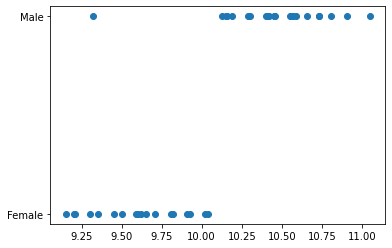

In [4]:
plt.scatter(df['size(cm)'],df['class(y)'])
plt.show()

In [5]:
df0=df[df['class(y)']=='Female']
df1=df[df['class(y)']=='Male']

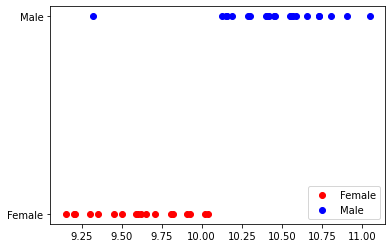

In [6]:
plt.scatter(df0['size(cm)'],df0['class(y)'],color='red',label='Female')
plt.scatter(df1['size(cm)'],df1['class(y)'],color='blue',label='Male')
plt.legend()
plt.show()

In [7]:
#preprocessing
df['class(y)']=df['class(y)'].replace(['Male','Female'],[1,0])

In [8]:
df.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(df[['size(cm)']],df['class(y)'],test_size=.30)

In [11]:
xtrain.head()

,size(cm)
9,9.65
8,9.71
30,10.04
36,9.21
17,9.93


In [12]:
ytrain.head()

9     0
8     0
30    0
36    0
17    0
Name: class(y), dtype: int64

In [13]:
xtest.head()

,size(cm)
15,10.730
2,10.410
10,9.820
1,10.125
32,10.400


In [14]:
ytest.head()

15    1
2     1
10    0
1     1
32    1
Name: class(y), dtype: int64

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
reg=LogisticRegression()

In [17]:
reg.fit(xtrain,ytrain)

LogisticRegression()

In [18]:
reg.coef_

array([[2.16388853]])

In [19]:
reg.intercept_

array([-21.75337105])

In [20]:
reg.predict_proba(xtest)

array([[0.18768046, 0.81231954],
       [0.31589348, 0.68410652],
       [0.62339551, 0.37660449],
       [0.46107881, 0.53892119],
       [0.32058826, 0.67941174],
       [0.57669869, 0.42330131],
       [0.24620967, 0.75379033],
       [0.37448069, 0.62551931],
       [0.42637586, 0.57362414],
       [0.76788909, 0.23211091],
       [0.25432953, 0.74567047],
       [0.10362342, 0.89637658]])

In [21]:
reg.predict(xtest)

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [22]:
ytest

15    1
2     1
10    0
1     1
32    1
31    0
7     1
26    1
12    1
0     0
14    1
4     1
Name: class(y), dtype: int64

In [23]:
logistic_regression=logic=reg.score(xtest,ytest)

In [24]:
logic   #measuring accuracy 

1.0

# KNN Classifier Regression

In [25]:
from sklearn.neighbors import KNeighborsRegressor

In [26]:
neigh=KNeighborsRegressor(n_neighbors=5)  #creating object

In [27]:
neigh.fit(xtrain,ytrain)    #training

KNeighborsRegressor()

In [28]:
pred1=neigh.predict(xtest)

In [29]:
pred1

array([1. , 1. , 0. , 0.6, 1. , 0. , 1. , 1. , 0.6, 0. , 1. , 1. ])

In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [31]:
mse=mean_squared_error(ytest,pred1)

In [32]:
mse

0.026666666666666672

In [33]:
mae=mean_absolute_error(ytest,pred1)

In [34]:
mae

0.06666666666666667

In [35]:
#measuring accuracy
knn_regression=r2_score(ytest,pred1)

In [36]:
knn_regression

0.8577777777777778

In [37]:
import seaborn as sns

In [40]:
data=[['logistic_regression',1.0] ,['knn_regression',0.8577777777777778]] 
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Algorithm Name', 'Accuracy'])
  
# print dataframe.
df

,Algorithm Name,Accuracy
0,logistic_regression,1.000000
1,knn_regression,0.857778


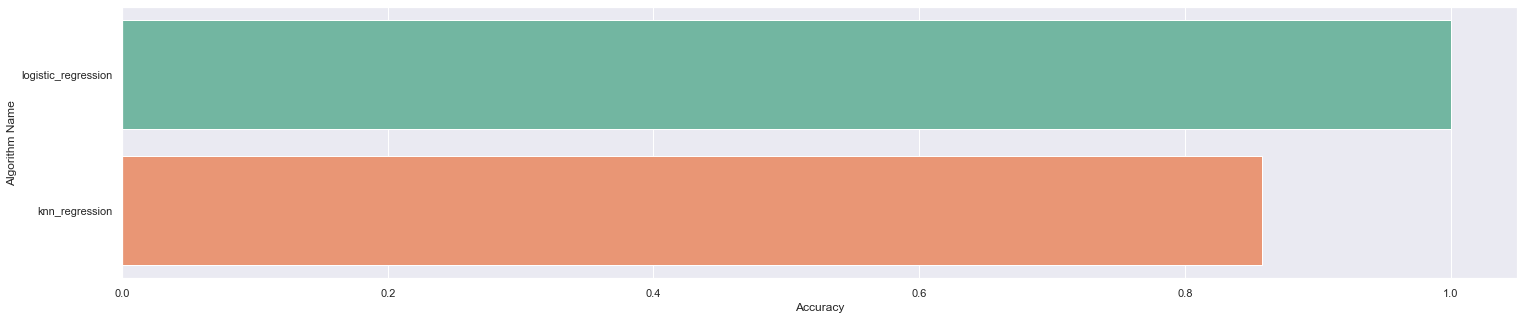

In [41]:
sns.set()
sns.barplot(y="Algorithm Name",x="Accuracy",data=df,palette='Set2')
sns.set(rc={'figure.figsize':(25,5)})